In [14]:
import tensorflow as tf
tf.__version__

'1.13.1'

In [15]:
tf.test.gpu_device_name()

''

In [16]:
import tensorflow as tf
print(tf.__version__)

import numpy as np
import matplotlib.pyplot as plt

1.13.1


In [17]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [0]:
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9
num_class = 10

y = 5 Sandal


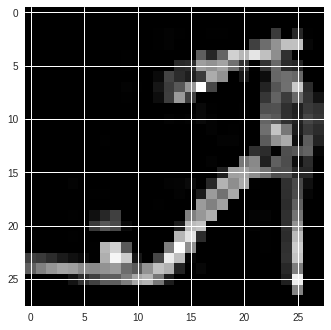

In [19]:
img_index = 8
label_index = int(y_train[img_index])
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
plt.imshow(x_train[img_index].astype(np.uint8), cmap='gray')

In [20]:
y_train_hot = tf.keras.utils.to_categorical(y_train, 10)
y_test_hot =  tf.keras.utils.to_categorical(y_test, 10)
y_train_hot

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation



In [22]:
x_train = x_train.reshape(60000,28,28,1)
x_train.shape



(60000, 28, 28, 1)

In [23]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add( Conv2D(100, 3, activation='relu', padding='same', input_shape=(28,28,1)) )
model.add( Conv2D(50, 3, activation='relu', padding='same') )
model.add( MaxPooling2D(2,2) )
model.add( Conv2D(50, 3, activation='relu', padding='same') )
model.add( MaxPooling2D(2,2) )
model.add( Flatten() )
model.add( Dense(10, activation='softmax') )
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 100)       1000      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 50)        45050     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 50)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 50)        22550     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2450)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                24510     
Total para

In [24]:
model = Sequential()
model.add( Flatten(input_shape = (28,28,1)) )
model.add( Dense(100, activation='sigmoid') )
model.add( Dense(100, activation='sigmoid') )
model.add( Dense(100, activation='sigmoid') )
model.add( Dense(10, activation='softmax') )
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 99,710
Trainable params: 99,710
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy', optimizer = 'sgd', metrics=['accuracy'])

In [26]:
model.fit(x_train, y_train_hot, epochs=10, batch_size=200, shuffle=True, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
48000/48000 [==============================] - 2s 38us/sample - loss: 2.2889 - acc: 0.2230 - val_loss: 2.2572 - val_acc: 0.3610
Epoch 2/10
48000/48000 [==============================] - 1s 28us/sample - loss: 2.2350 - acc: 0.4165 - val_loss: 2.2105 - val_acc: 0.4518
Epoch 3/10
48000/48000 [==============================] - 1s 30us/sample - loss: 2.1811 - acc: 0.4256 - val_loss: 2.1477 - val_acc: 0.4277
Epoch 4/10
48000/48000 [==============================] - 2s 32us/sample - loss: 2.1061 - acc: 0.4342 - val_loss: 2.0615 - val_acc: 0.5177
Epoch 5/10
48000/48000 [==============================] - 2s 34us/sample - loss: 2.0098 - acc: 0.4686 - val_loss: 1.9563 - val_acc: 0.4755
Epoch 6/10
48000/48000 [==============================] - 1s 31us/sample - loss: 1.9008 - acc: 0.4802 - val_loss: 1.8473 - val_acc: 0.5347
Epoch 7/10
48000/48000 [==============================] - 1s 31us/sa

In [27]:
model.evaluate(x_train, y_train_hot)

60000/60000 [==============================] - 2s 39us/sample - loss: 1.5553 - acc: 0.5632


[1.5552651571273803, 0.5632167]

In [28]:
x_test = x_test.reshape(10000,28,28,1)
model.evaluate(x_test, y_test_hot)

10000/10000 [==============================] - 0s 39us/sample - loss: 1.5581 - acc: 0.5584


[1.5581244428634644, 0.5584]

y = 5 Sandal


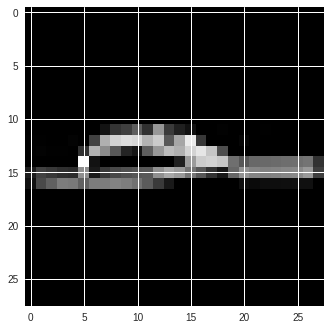

In [29]:
img_index = 8
label_index = int(y_test[img_index])
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
plt.imshow(x_test[img_index,:,:,0].astype(np.uint8), cmap='gray')

In [30]:
pred = model.predict(x_test[img_index].reshape(1,28,28,1))
print(pred)
print(pred.argmax(-1))

[[0.01782707 0.02183244 0.04024256 0.02745255 0.03283671 0.22477725
  0.03677802 0.22945654 0.17284864 0.19594824]]
[7]
